In [7]:
import cv2 as cv
import numpy as np
import os
import sys
import torch
import matplotlib.pyplot as plt

os.getcwd()

'C:\\Users\\User\\pythonsave'

In [8]:
cv.__version__

'4.5.4'

In [9]:
for dirname, _, filenames in os.walk('C:\\Users\\User\\pythonsave\\images\\myImage\\'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

C:\Users\User\pythonsave\images\myImage\1638960014944.png
C:\Users\User\pythonsave\images\myImage\20140404054625209.jpg
C:\Users\User\pythonsave\images\myImage\20211204_170851.jpg
C:\Users\User\pythonsave\images\myImage\the_wave.t7.jpg
C:\Users\User\pythonsave\images\myImage\style\candy.t7
C:\Users\User\pythonsave\images\myImage\style\feathers.t7
C:\Users\User\pythonsave\images\myImage\style\mosaic.t7
C:\Users\User\pythonsave\images\myImage\style\the_wave.t7
C:\Users\User\pythonsave\images\myImage\style\udnie.t7


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


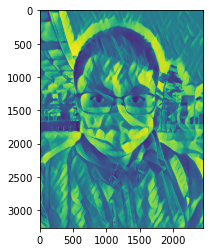

In [37]:
if __name__=='__main__':
    
    image=cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\20211204_170851.jpg')
    
    if image is None:
        print('Failed to read Image')
        sys.exit()
    
    #cv.imshow('Origin',image)
    image_mean=np.mean(image)
    h,w=image.shape[:-1]
    styles=['the_wave.t7', 'mosaic.t7', 'feathers.t7', 'candy.t7', 'udnie.t7']
    
    for i in range(len(styles)):
        
        net=cv.dnn.readNet('C:\\Users\\User\\pythonsave\\images\\myImage\\style\\{}'.format(styles[i]))

        # 调整图像尺寸
        blob = cv.dnn.blobFromImage(image, 1.0, size=(512, 512), mean=image_mean, swapRB=False, crop=False)
        # 计算网络对图像的处理结果
        net.setInput(blob)
        prob = net.forward()

        # 解析输出
        prob = prob.reshape(3, prob.shape[2], prob.shape[3])
        # 恢复图像减掉的均值
        prob += image_mean
        # 对图像进行归一化
        prob /= 125.0
        #換位置
        prob = prob.transpose(1, 2, 0)
        #prob = np.clip(prob, 0.0, 1.0)
        print(prob.shape)
        prob = cv.normalize(prob[:,:,0], prob[:,:,0], 0, 255, cv.NORM_MINMAX)

        # 调整到最终需要显示的图像尺寸
        
        
        result = np.uint8(cv.resize(prob, (w, h,)))
        plt.imshow(result)
        cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format(styles[i]),result)
        
# cv.waitKey(0)
# cv.destroyAllWindows()        

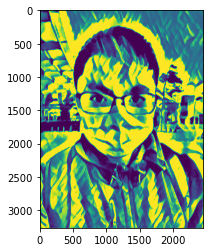

In [34]:
import matplotlib.pyplot as plt
image=cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\20211204_170851.jpg',1)
plt.imshow(result)

In [32]:
result[:,:,np.newaxis]

array([[[122],
        [122],
        [121],
        ...,
        [141],
        [141],
        [141]],

       [[122],
        [122],
        [121],
        ...,
        [141],
        [141],
        [141]],

       [[122],
        [122],
        [121],
        ...,
        [141],
        [141],
        [141]],

       ...,

       [[204],
        [204],
        [204],
        ...,
        [204],
        [204],
        [204]],

       [[204],
        [204],
        [204],
        ...,
        [204],
        [204],
        [204]],

       [[204],
        [204],
        [204],
        ...,
        [204],
        [204],
        [204]]], dtype=uint8)